## Age Detection

__Dataset__ : The dataset consists of images(feature) of indian actors and their age(label) as label. And here we're gonna predict age of an actor from his/her image. For this purpose we're gonna use keras, pandas, numpy and convolutional neural network. Indian Movie Face database (IMFDB) is a large unconstrained face database consisting of 34512 images of 100 Indian actors collected from more than 100 videos. All the images are manually selected and cropped from the video frames resulting in a high degree of variability in terms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup.

## <b>Step 1 </b>: Import all the required libraries 

<b>We are going to use following libraries::</b>

* __1. Pandas__  --> To import dataset in the form of dataframe
* __2. Numpy__ --> To easily handel complex computations
* __3. Sklearn__ --> To easily handel machine learning operations
* __4. Keras__ --> To easily implement comvolutional neural network
* __5. Pickle__ --> To save our model
* __6. Seaborn__ --> For ploting 

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image
from keras.utils import np_utils
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

## <b>Step 2 </b> : Extract all the required data and combine it

Set path to extract iamges and store them into a list 'images'.

1. __Train__ : This is the food for our model. It contains the images we’re going to use to teach our model.

2. __train.csv__ : This contains the labels for the images in Train dataset, i.e., if the person in the image is young, middle aged or old.

3. __Test__ : This file contains the Images we’re going to test our models on after training, to know if our model has learnt to tell the age of a person by looking at an image.

4. __test.csv__ : This contains the labels for the images in test dataset, i.e., if the person in the image is young, middle aged or old.

Combine the training and testing datasets in the form of an array to teach our model what a young, middle aged and old person looks like.

In [2]:
import os.path
path = 'dataset/Train/'
flag = os.path.exists('dataset/Train/')
if flag:
    images = !ls {path}
else:
    print("File does not exist!")

Import the CVS file containing name of the images and its labels (age).

In [3]:
if flag:
    train_labels = pd.read_csv('dataset/train.csv')
    train_labels.head()
else:
    print("File does not exist!")


In [4]:
train_labels.shape

(19906, 2)

Here we can see that labels are categorised into 3 groups
* OLD
* MIDDLE 
* YOUNG

In [5]:
train_labels['Class'].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

Here we can see the distrbution of the data

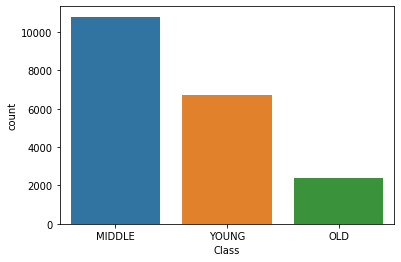

In [6]:
sb.countplot(train_labels.Class, data = train_labels)

Data_combiner will -
* __Resize the images__  
* __assign proper label to the array form of an image__ 

return feature and label in the form of array.

Size of image affects the computation time. So to reduce the computation time, we'll need to reduce the size of image.  

In [7]:
def data_combiner(images, label_data, path):
    features=[]
    labels=[]
    for each in images:
        features.append(np.asarray(Image.open(path+each).resize((64,64)), dtype='int32'))
        labels.append(np.asarray(label_data[label_data['ID']==each]['Class']))
    return np.array(features), np.array(labels)

In [8]:
# Using object of class data_Label_Combiner call method Data_combiner
train_labels.head()
features, labels = data_combiner(images, train_labels, path)

In [9]:
features.shape, labels.shape

((19906, 64, 64, 3), (19906, 1))

## Step 3 : Data Preprocessing

As our labels are in categorical form we need to apply one hot encoding on it, so that it'll get converted into numerical form. 
For this we'll have to convert string data into numerical format by assigning numerical value to each unique element, because sklearn supports one hot encoding only for data in numerical format. 

In [10]:
le = LabelEncoder()

In [11]:
le.fit(labels)

LabelEncoder()

In [12]:
labels

array([['MIDDLE'],
       ['MIDDLE'],
       ['YOUNG'],
       ...,
       ['YOUNG'],
       ['YOUNG'],
       ['OLD']], dtype=object)

In [13]:
labels = le.transform(labels)
labels

array([0, 0, 2, ..., 2, 2, 1])

In [ ]:
labels = np_utils.to_categorical(labels)
labels

## Step 4 :  Split the data into train and test set
Here we are using train_test_split method from sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size = 0.8)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3981, 64, 64, 3), (15925, 64, 64, 3), (3981, 3), (15925, 3))

## Step : Define the structure of neural network

The Sequential model is a linear stack of layers.

Create an object ( 'clasifier' ) of Sequential model from sklearn 

In [17]:
classifier = Sequential()

Add layers to the neural network using .add method

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape

### __Convolution Layer__
Convolution is a mathematical operation to merge two sets of information. In our case the convolution is applied on the input data using a convolution filter to produce a feature map. 

### __MaxPooling2D__
The max pooling is saying, if the feature is detected anywhere in this filter then keep a high number. But the main reason why people are using pooling because its works well in practice and reduce computations.

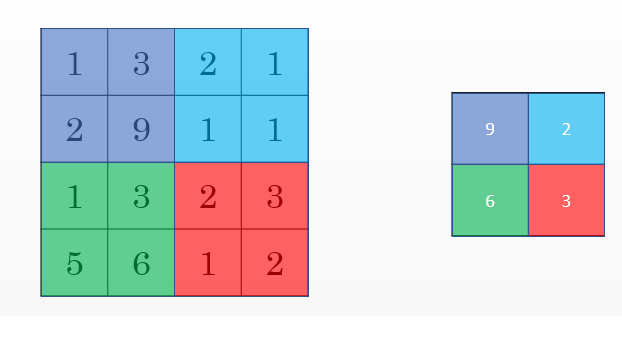

In [18]:
from IPython.display import Image
Image("pooling.png")

### __Dropout__
Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

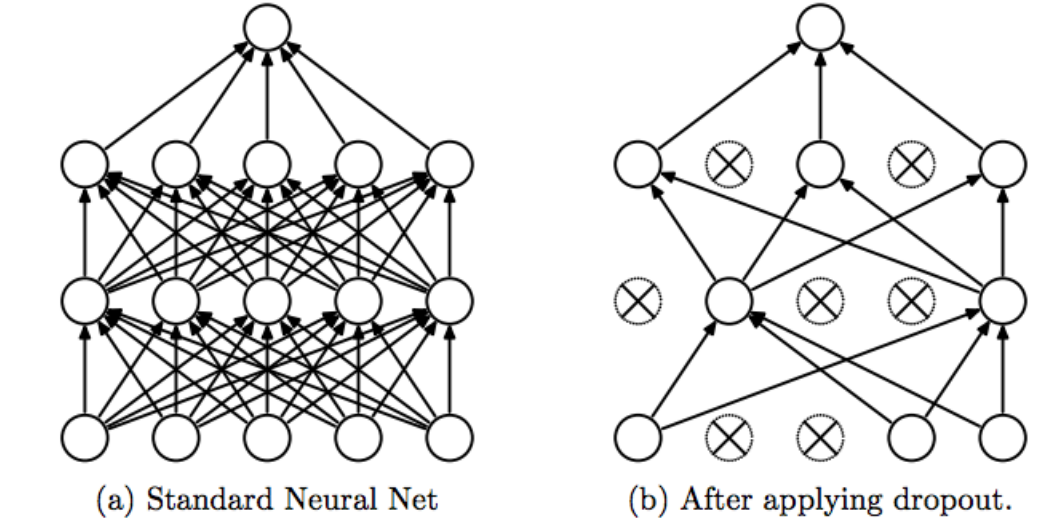

In [19]:
from IPython.display import Image
Image("dropout.png")

### __Dense Layer__
In dense layer we'll combine all the dimenssions to form a single 1D array.

In [20]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3),  padding='valid',activation='relu', input_shape=(64,64,3)))

classifier.add(Convolution2D(16, (3, 3), padding='valid',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Convolution2D(8, (3, 3), padding='valid',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(3, activation='softmax'))


Before training a model, you need to configure the learning process, which is done via compile method

In [21]:
classifier.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam' )

ImageDataGenerator used for augmentation of images according to parameters. Image augmentation is artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

In [22]:
train_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.3,
    shear_range=0.3,
    rescale=1.0/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

255 is the maximin pixel value. Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1]. 

In [23]:
val_generator = ImageDataGenerator(rescale=1.0/255)

fit_generator will load the data into RAM and perform training on batches that we have provided as parameters.

In [ ]:
history = classifier.fit_generator(train_generator.flow(x_train,y_train,batch_size=32)
                        , steps_per_epoch=len(x_train)
                        , epochs=50
                        ,validation_data=val_generator.flow(x_test,y_test,batch_size=32)
                        ,validation_steps=len(x_test), workers = 0)

In [25]:
classifier.evaluate(x_test ,y_test)

15925/15925 [==============================] - 13s 847us/step


[4.950880358859171, 0.671208918094635]

Predict the values for test data

In [26]:
y_pred = classifier.predict_classes(x_test)

In [27]:
y_pred

array([0, 2, 1, ..., 0, 1, 0])

## Save the model in pickle file

We'll save the classifire to the pickle file. We save our model to pickle file so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk.

In [30]:
with open('model/age_de_model.pkl','wb') as f:
    pickle.dump(le, f)
    pickle.dump(classifier,f)
    
classifier.save_weights("model/age_de_model.h5")
print("Saved model to disk")

Saved model to disk
